**Predicting the quality of wine using regression**

For this project we will be using this "Red Wine Quality" dataset found on Kaggle.
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Original dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This dataset contains 1600 rows of chemical/sensory inputs (related to red and white variants of the Portuguese "Vinho Verde" wine) that might affect the critical rating of a wine, as well as the quality score that each wine recieved on a scale of 1 to 10. 

How do the physicochemical properties of a given bottle of wine affect the critical score given it?

To answer this question, we will build a classification model to predict the quality of a given wine (values ranging from 1 to 10) given the different chemical/sensory inputs (eg.- volatile acidity, residual sugar, pH, etc.).


Here we load/install all of the libraries needed for visualizations and our prediction models.

In [3]:
install.packages("GGally")

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

We needed to change the names of the columns because some contained spaces which aren't allowed when you're trying to enter variables into R functions. We also used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [64]:
names <- c("fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality")

# need to add url?

wine <- read_csv("winequality-red.csv", col_names = names, skip = 1)%>%
   mutate(quality = as_factor(quality))
wine

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_sulfur_dioxide = col_double(),
  total_sulfur_dioxide = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


**Possible predictor variables:**
Fixed acidity, pH, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulphur dioxide, Total sulphur dioxide, Density, Sulphates, Alcohol

**Prediction variable:**
Quality

Here the data is split into the training and testing data - we have to do this now because to accurately visualize the relationships between the variables and quality we have to use only the data we are going to train the model on.

In [67]:
set.seed(20)
wine_split <- initial_split(wine, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)  
wine_test <- testing(wine_split)


All of the possible predictors have a certain correlation and influence in determining the quality of wine, but which ones have the strongest correlation and therefore are ideal to use?

We used the ggpairs function to determine relationship between quality and all the other variables to find out what variables we should take into consideration. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



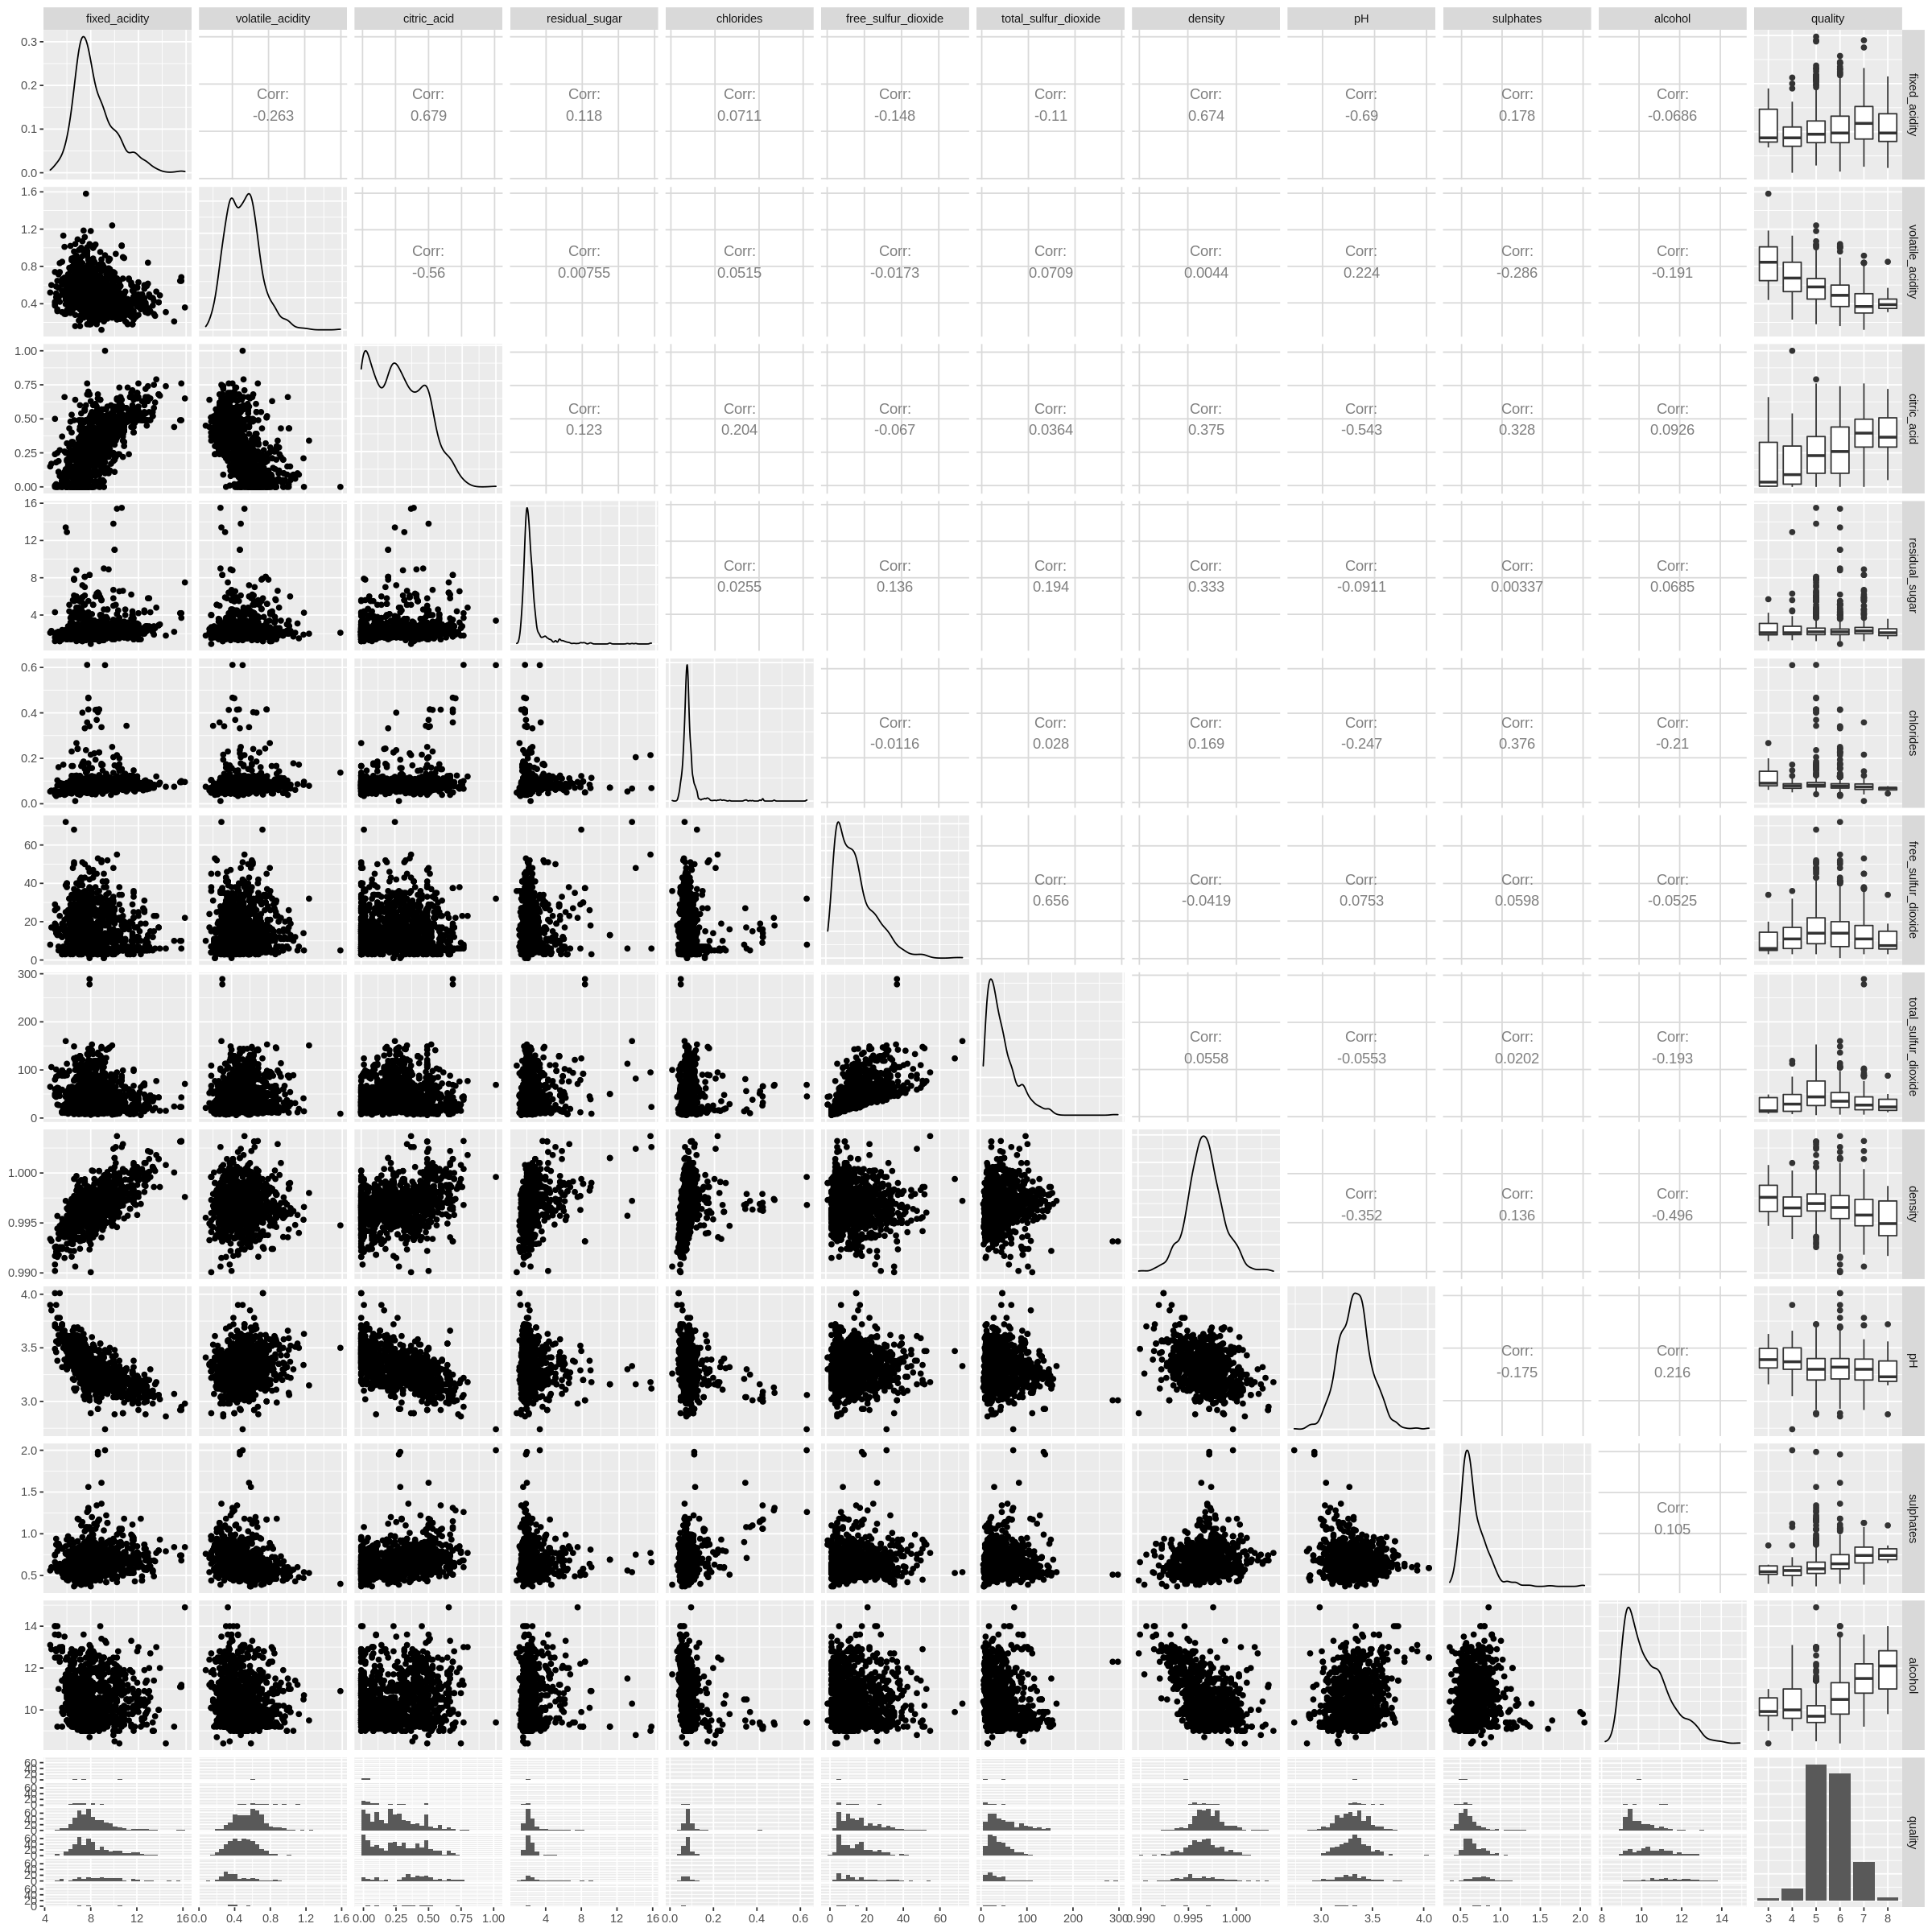

In [68]:
set.seed(20)
options(repr.plot.width = 20, repr.plot.height = 20)
ggpairs(wine_train)


We decided to choose the 3 variables  
They are:
1. Alcohol content 
2. Volatile acidity 
3. Density


We chose these three variables because they are the ones with the least overlapping boxes in the correlation table above constructed using GGpairs. Since the boxes are more spread out in these variables than in the others, these variables will give us more accurate predictions than the other variables, because knn- classification works better on scattered data, as compared to densely packed data points. 

We will use these trends observed in the data to predict the quality of wine using knn-nearest neighbors classification models. However, visualization of our results will be difficult, considering the fact that we are using 3 predictor variables. We would need a way to make a 4d visualization, which may not be attainable. One possibility is to train the model on one predictor variable at a time and compare the 2d plots that will be created.

The impact that our findings could have are: Wine manufacturers could use our model to estimate the quality of a wine they have created and try to alter manufacturing processes to make higher quality (and therefore more expensive) wine.

Future questions this exploration could lead to are: How does wine quality affect the price of wine? How does quality affect the popularity of certain kinds of wine?


Here we are visualizing the relationship between quality and our chosen variables using coloured histograms. The y axis holds a count of the variables, while the x axis is the quality. The graph is coloured according to the quality of the wine.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



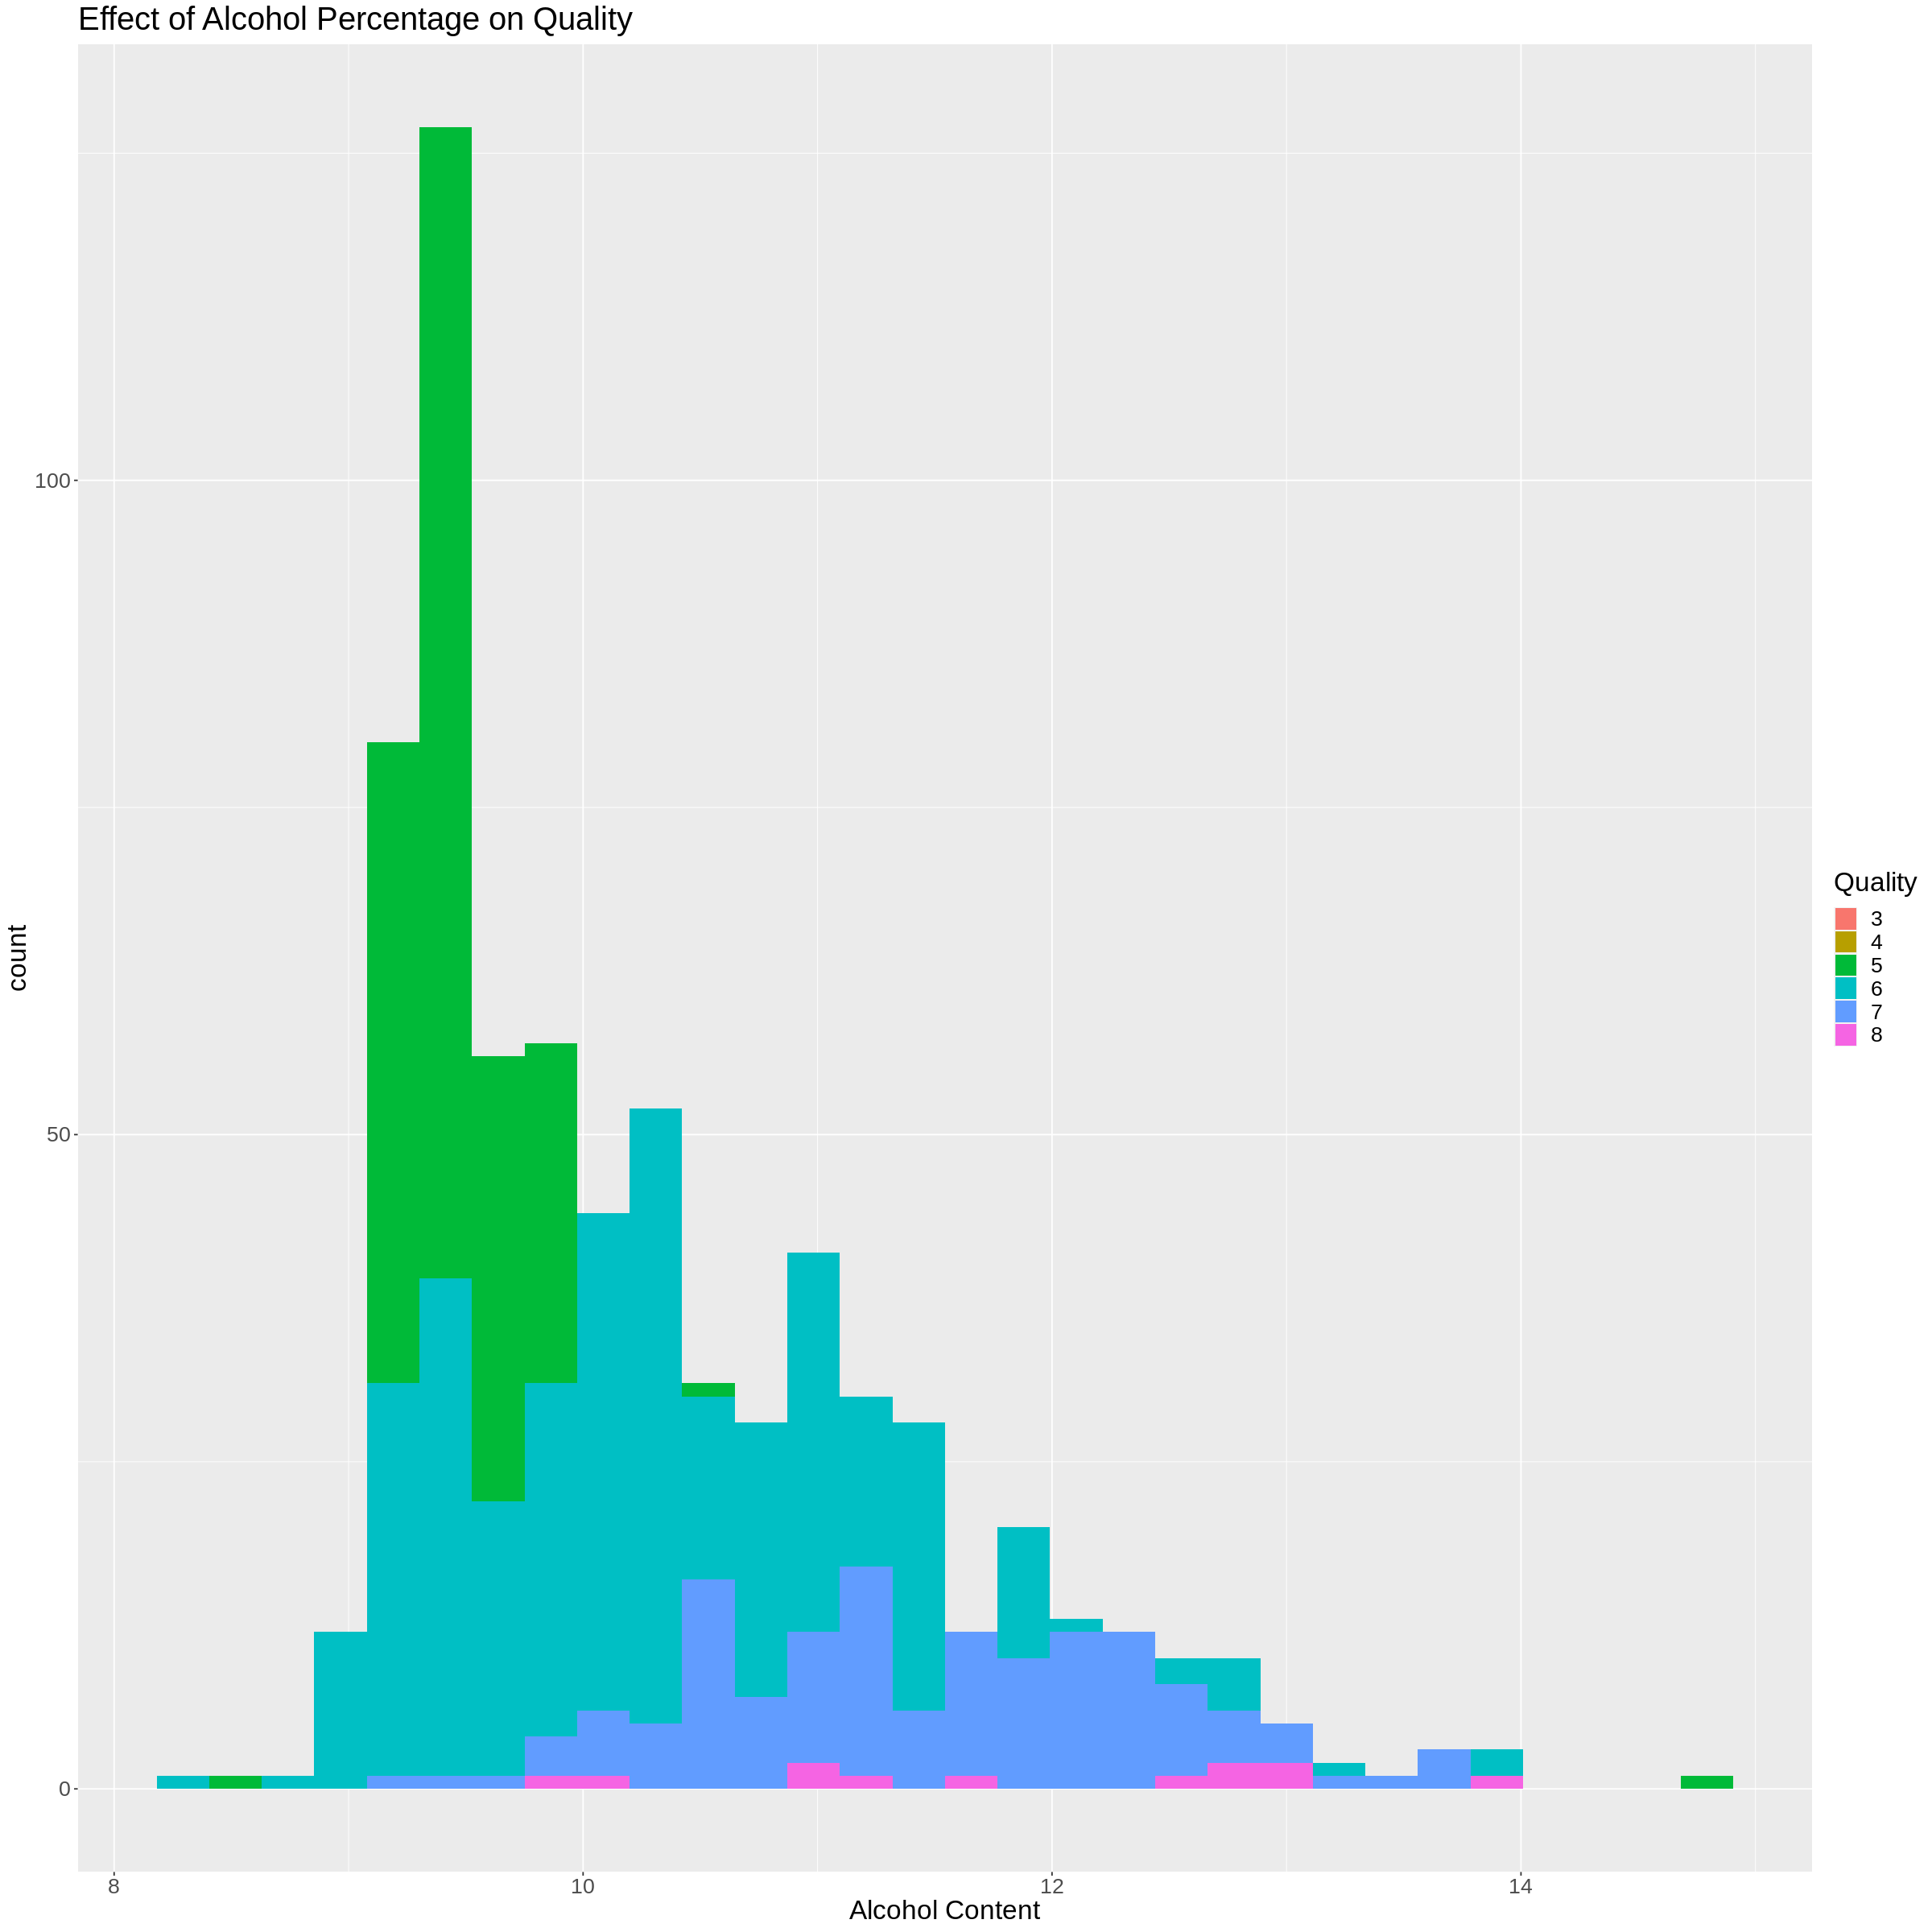

In [77]:
set.seed(20)
options(repr.plot.width = 20, repr.plot.height = 20)
visualization_one <- ggplot(wine_train, aes(x = alcohol, fill = quality))+
    geom_histogram(position = "identity")+
    labs(x = "Alcohol Content", fill = "Quality")+
    theme(text = element_text(size = 20))+
    ggtitle("Effect of Alcohol Percentage on Quality")
visualization_one


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



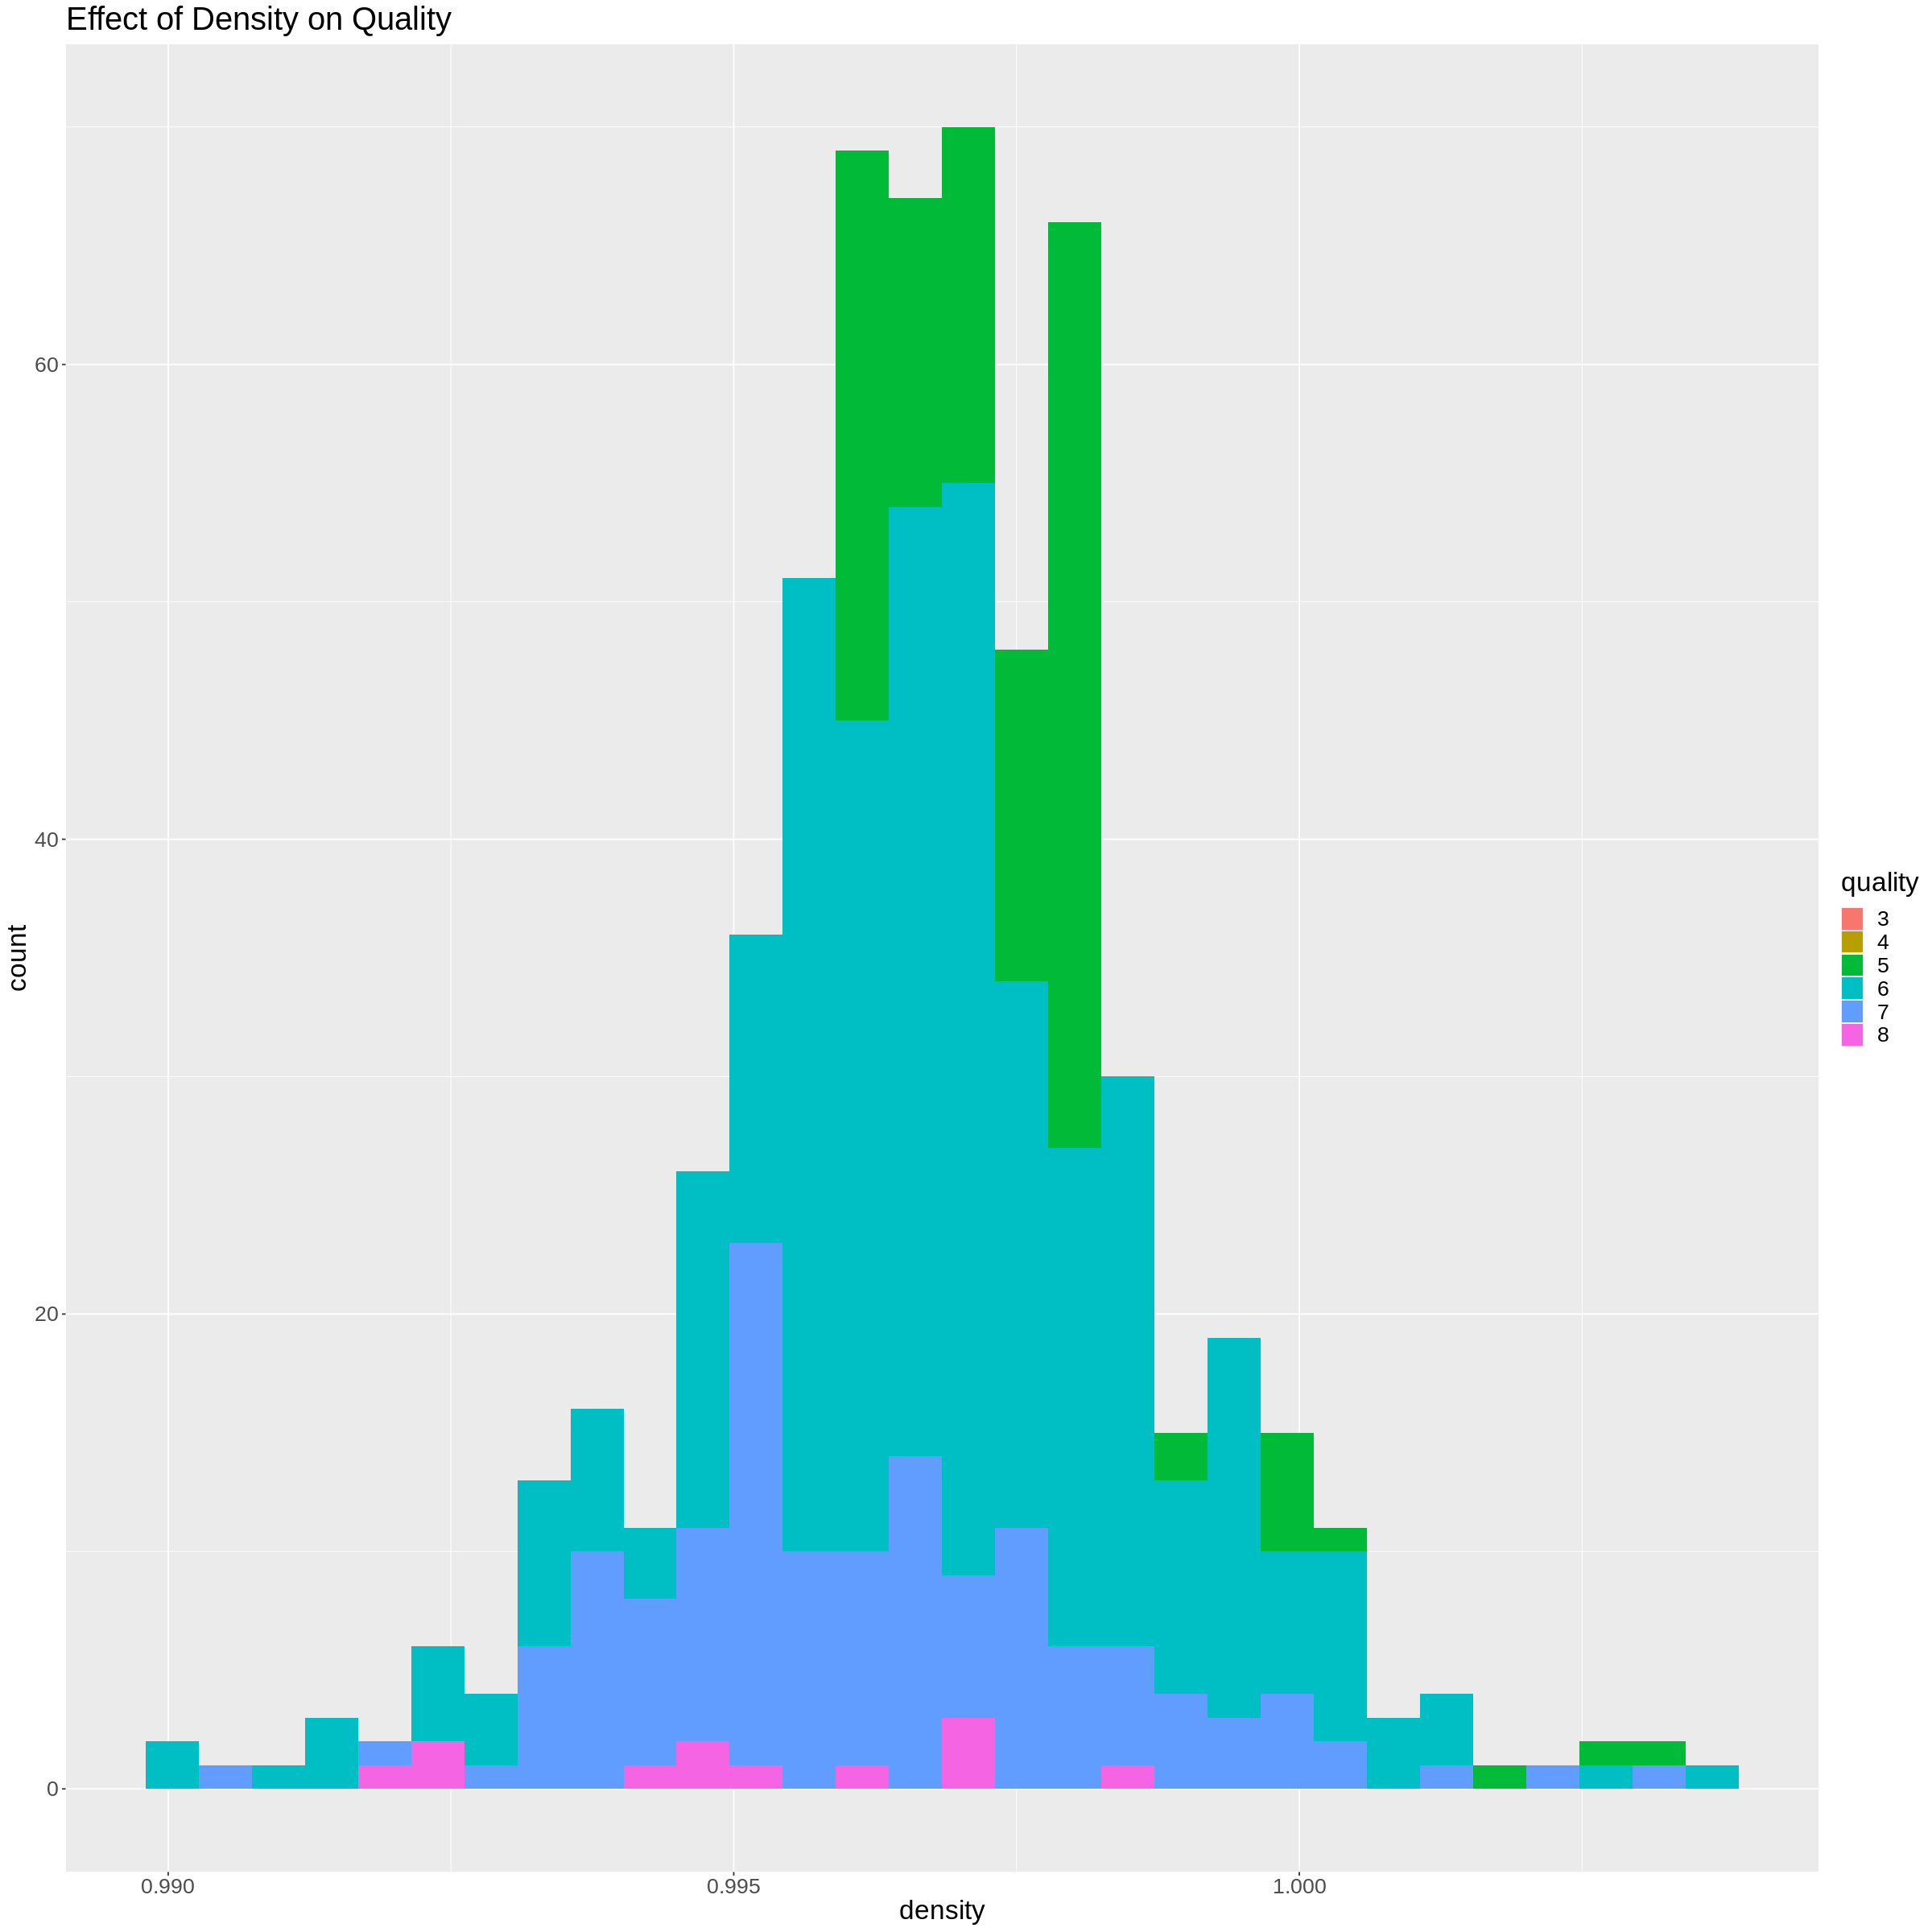

In [75]:
set.seed(20)
visualization_two <- ggplot(wine_train, aes(x = density, fill = quality))+
    geom_histogram(position = "identity")+
    xlab("density")+
    theme(text = element_text(size = 20))+
    ggtitle("Effect of Density on Quality")
visualization_two

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



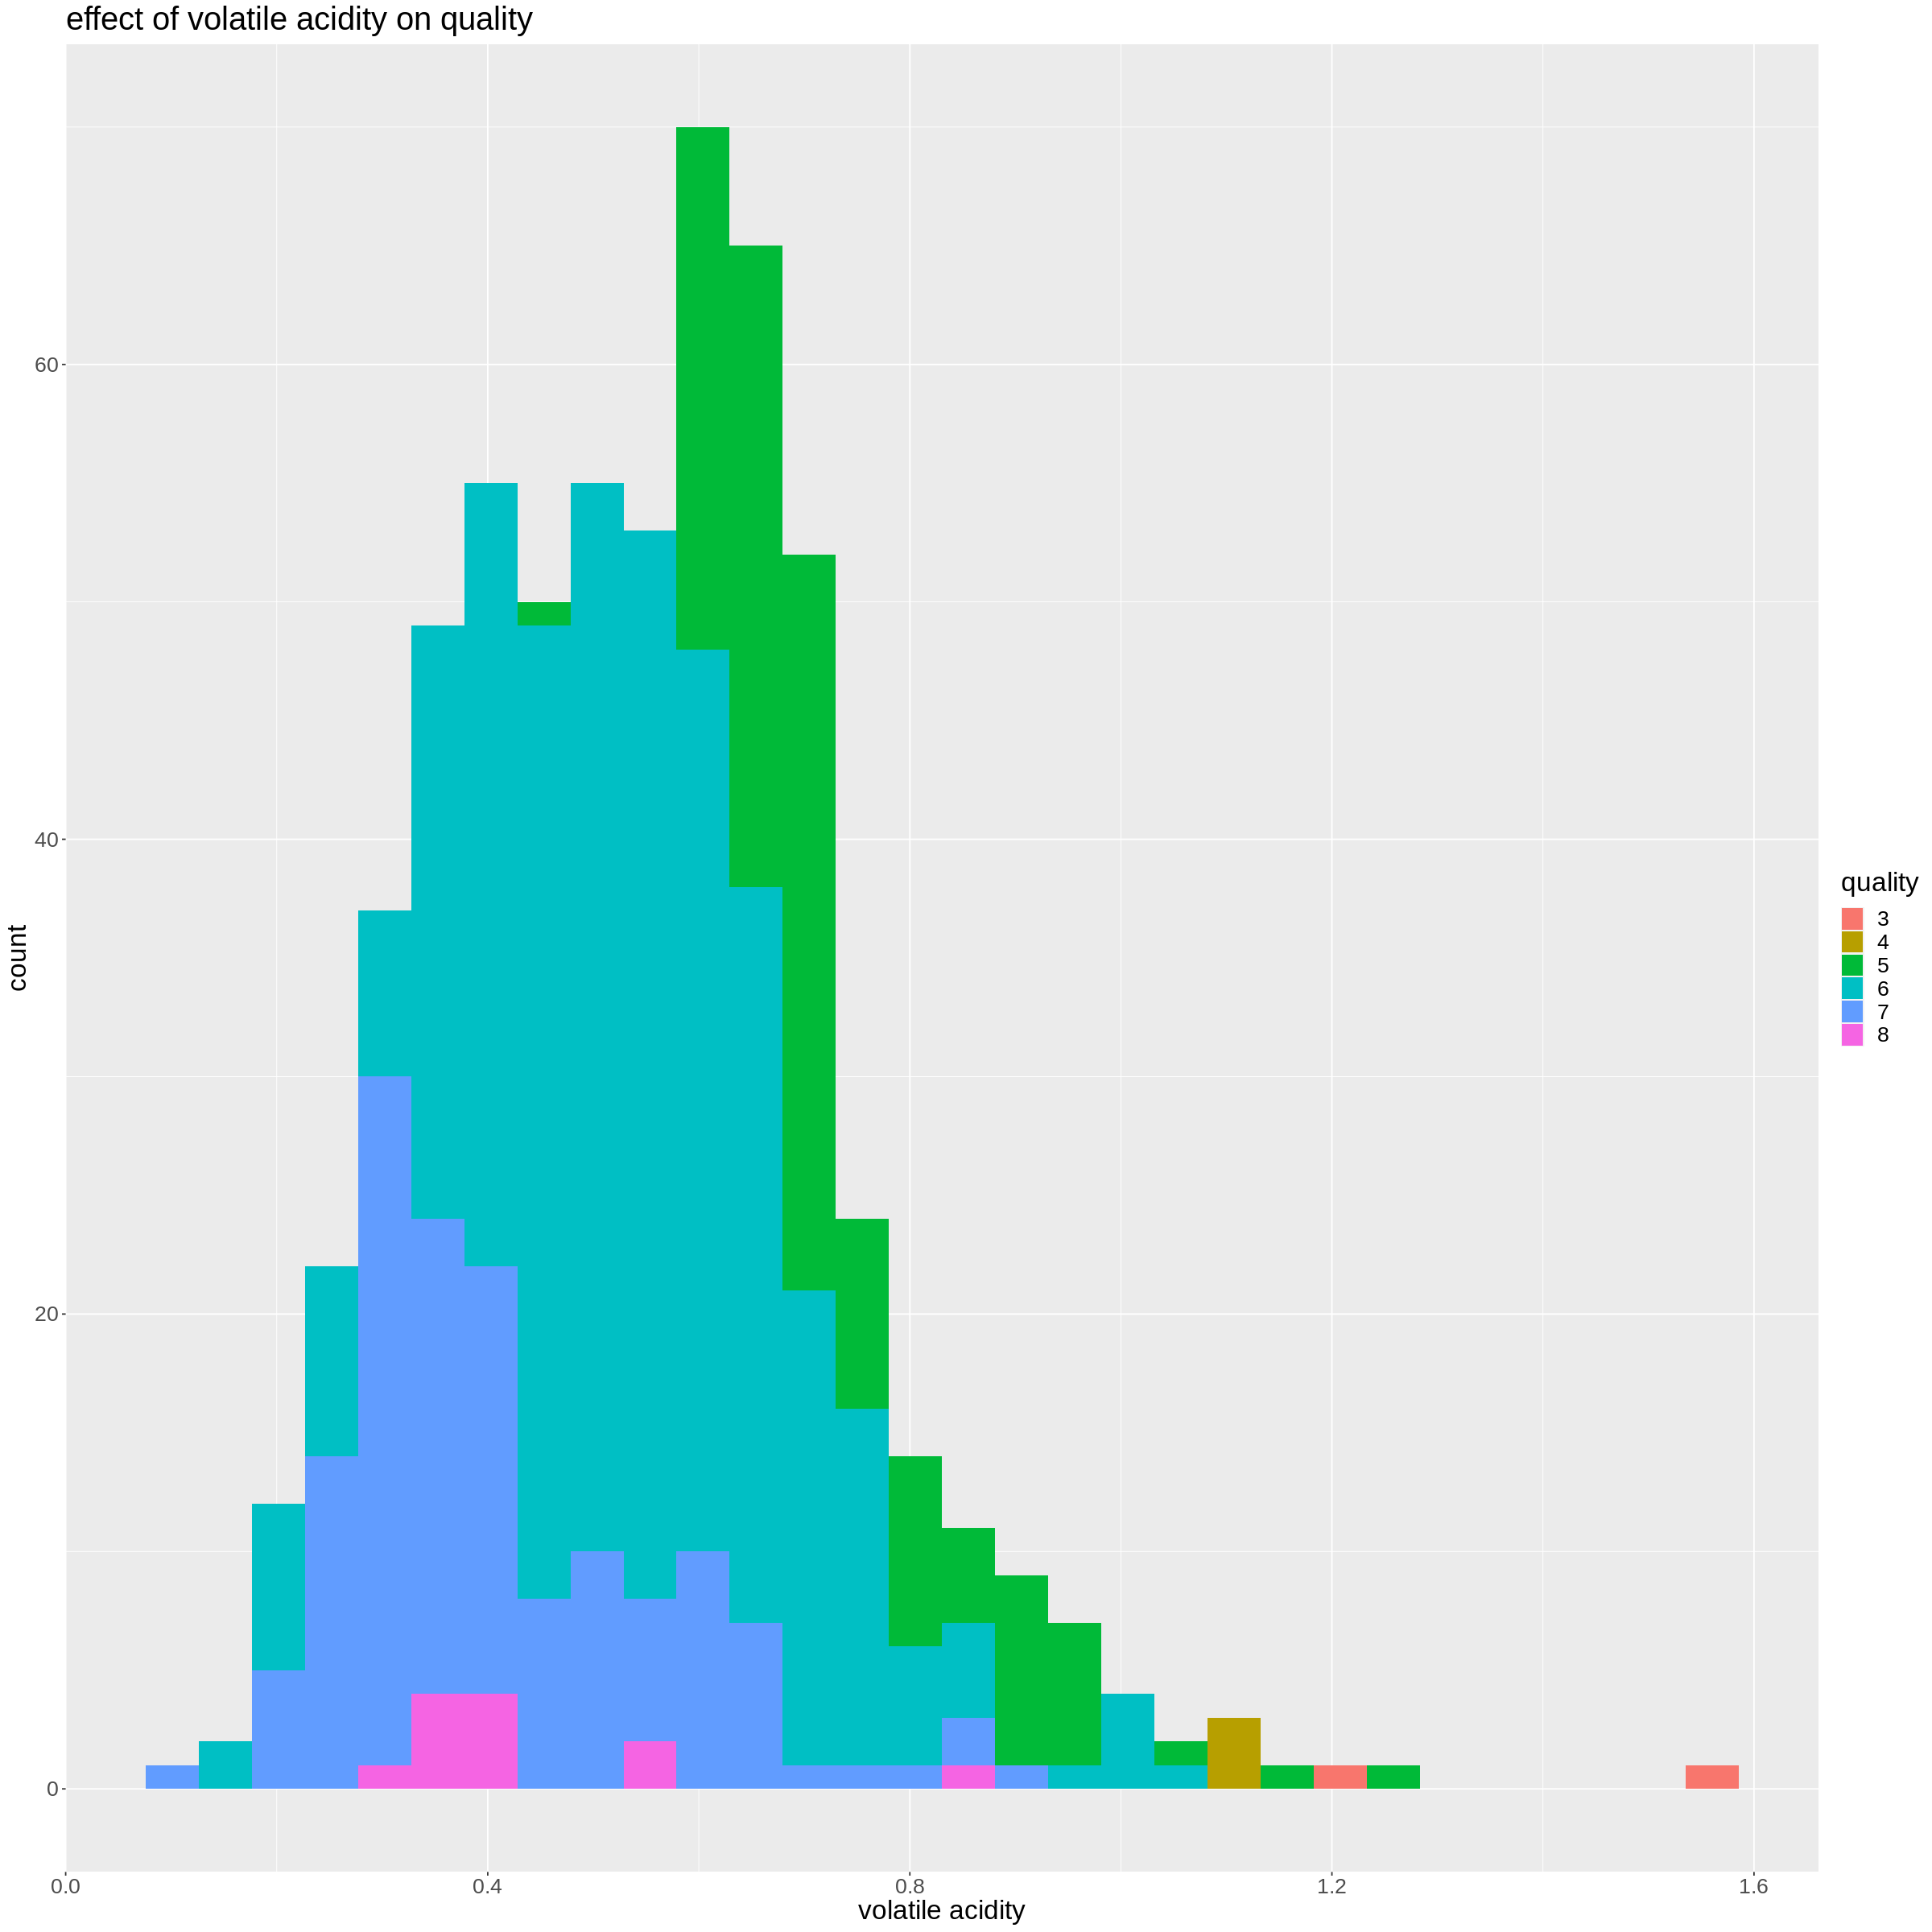

In [73]:
visualization_three <- ggplot(wine_train, aes(x = volatile_acidity, fill = quality))+
    geom_histogram(position = "identity")+
    xlab("volatile acidity")+
    theme(text = element_text(size = 20))+
    ggtitle("effect of volatile acidity on quality")
visualization_three

In [114]:
set.seed(20)
wine_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

wine_recipe <- recipe( quality ~ alcohol +  density + volatile_acidity , data = wine_train) %>%
             step_scale(all_predictors()) %>%
             step_center(all_predictors())

wine_vfold <- vfold_cv(wine_train, v = 10, strata = quality)

gridval <- tibble(neighbors = seq(1,40))

wine_results <- workflow()%>%
    add_recipe(wine_recipe)%>%
    add_model(wine_spec)%>%
    tune_grid(resamples = wine_vfold, grid = gridval)%>%
    collect_metrics()
wine_results


! Fold04: internal: No observations were detected in `truth` for level(s): '3', '8...

! Fold05: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold06: internal: No observations were detected in `truth` for level(s): '3', '8...

! Fold10: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5895120,10,0.008743655,Model01
1,roc_auc,hand_till,0.6192959,10,0.008831738,Model01
2,accuracy,multiclass,0.5895120,10,0.008743655,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
39,roc_auc,hand_till,0.7216591,10,0.009971326,Model39
40,accuracy,multiclass,0.5754003,10,0.015726730,Model40
40,roc_auc,hand_till,0.7196947,10,0.010002470,Model40


In [134]:
set.seed(20)
best_k <- wine_results %>%
    filter(.metric == "accuracy")%>%
    arrange(desc(mean, std_err))%>%
    slice(2)%>%
    pull(neighbors)
best_k

[1] 2

After we performed the cross validation by dividing each training data into sets of 10, we decided to take the best K value from the table we created. 

In [125]:
set.seed(20)
wine_best_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = 2) %>%
       set_engine("kknn") %>%
       set_mode("classification")

wine_best_fit <- workflow()%>%
    add_recipe(wine_recipe)%>%
    add_model(wine_best_spec)%>%
    fit(data = wine_train)

wine_summary <- wine_best_fit%>%
    predict(wine_test)%>%
    bind_cols(wine_test)%>%
    metrics(truth = quality, estimate = .pred_class)
wine_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6080402
kap,multiclass,0.3960253
